# 0042. Trapping Rain Water

| **Author** | **Last Updated** | **Difficulty** | **Tags** |
| :--- | :--- | :--- | :--- |
| MD Saifullah Baig.A | 05.01.2026 | 🔴 Hard | Array, Two Pointers, Stack |

**Problem Link:** [LeetCode 0042](https://leetcode.com/problems/trapping-rain-water/)

---

## 1. Problem Statement
Given `n` non-negative integers representing an elevation map where the width of each bar is `1`, compute how much water it can trap after raining.

**Example:**
```text
Input: height = [0,1,0,2,1,0,1,3,2,1,2,1]
Output: 6
Explanation: The above elevation map (black section) is represented by array [0,1,0,2,1,0,1,3,2,1,2,1]. 
In this case, 6 units of rain water (blue section) are being trapped.

## 2. Approach Overview

### 🚀 Approach 2: Two Pointers (Optimal)

> 💡 **My Breakthrough Moment:**  
> After struggling with the $O(N^2)$ brute force and then using $O(N)$ extra space for precomputation, I discovered something beautiful: I don't need to know the exact maximum on both sides—I only need to know which side has the smaller maximum! This insight led to the most elegant solution.

The two-pointer approach eliminates extra space by processing from both ends simultaneously, using the key insight that water level is determined by the smaller of the two boundaries.

#### Key Idea:
1. Use two pointers starting from both ends of the array.
2. Track the maximum height seen so far from left (`l_max`) and right (`r_max`).
3. Move the pointer with the smaller height inward.
4. The water trapped is determined by the smaller of the two maximums.
5. Process until pointers meet in the middle.

#### 🎨 Visual Walkthrough

Let's trace through `height = [0,1,0,2,1,0,1,3,2,1,2,1]`:

> **Initial State:**
> ```
> l=0, r=11
> height[0]=0, height[11]=1
> l_max=0, r_max=1
> 
> [0,1,0,2,1,0,1,3,2,1,2,1]
>  ↑                       ↑
>  l                       r
> ```

> **First Few Steps:**
> ```
> Step 1: height[l]=0 < height[r]=1 → Move left pointer
>   l_max=0, water=0-0=0
>   l=1
> 
> Step 2: height[l]=1 < height[r]=1 → Move left pointer
>   l_max=1 (update), water=0
>   l=2
> 
> Step 3: height[l]=0 < height[r]=1 → Move left pointer
>   l_max=1, water=1-0=1 💧
>   l=3
> ```

> **Key Insight Visualization:**
> ```
> When height[l] < height[r]:
>   We KNOW water at position l is limited by l_max
>   (because r_max is definitely ≥ height[r] > height[l])
>   
>         r_max (unknown exact value, but ≥ height[r])
>           ↓
>   l_max   █ ? ? ? ?   █ height[r]
>     █     █           █
>   █ █ ? █ █ ? ? ? ? █ █
>   ↑           ↑
> height[l]  We only need l_max here!
> ```

> **Why This Works Without Extra Space:**
> ```
> Brute Force: Scan left + Scan right = O(N²)
> Precomputation: Store all left_max + all right_max = O(N) space
> Two Pointers: Process one element at a time, no storage = O(1) space!
> 
> The magic: We don't need ALL maximums, just the relevant one
> ```

#### Logic Breakdown:
* **Step 1:** Initialize `l=0`, `r=n-1` (left and right pointers at edges)
* **Step 2:** Initialize `l_max=height[l]`, `r_max=height[r]`
* **Step 3:** While `l < r`:
  - **Step 3a:** Compare `height[l]` vs `height[r]`
  - **Step 3b:** If `height[l] < height[r]`:
    - Update `l_max` if current is taller
    - Otherwise, add water: `l_max - height[l]`
    - Move left pointer right: `l += 1`
  - **Step 3c:** Else (right side is smaller or equal):
    - Update `r_max` if current is taller
    - Otherwise, add water: `r_max - height[r]`
    - Move right pointer left: `r -= 1`
* **Step 4:** Return total water accumulated

#### 📈 Complexity Analysis

**Time Complexity:** $O(N)$
- 🟢 **Single Pass:** Each pointer moves at most $N$ times total
- 🟢 **Linear Traversal:** Left and right pointers together visit each element once
- 🟢 **Constant Operations:** Each iteration does $O(1)$ work

**Space Complexity:** $O(1)$
- ✅ **Only Variables:** Uses `l`, `r`, `l_max`, `r_max`, `result`
- ✅ **No Extra Arrays:** No auxiliary data structures needed
- 🏆 **Space Optimal:** Cannot do better than constant space

#### ⚡ The Perfect Solution

Comparing all approaches I've tried:

| Approach | Time | Space | Passes | Status |
|:---|:---|:---|:---|:---|
| Brute Force | $O(N^2)$ | $O(1)$ | $N$ nested | ❌ Too Slow |
| Precomputation | $O(N)$ | $O(N)$ | 3 passes | ✅ Good |
| Two Pointers | $O(N)$ | $O(1)$ | 1 pass | 🏆 Optimal |

**The Victory:** This achieves the best possible complexity in both time AND space. It's the holy grail of optimization.

#### Verdict:
✅ **Optimal Solution** — This approach achieves linear time with constant space, making it the gold standard for this problem. It's elegant, efficient, and demonstrates deep algorithmic understanding.

> 🎯 **The Core Insight:**  
> You don't always need complete information to make decisions. By processing from both ends and choosing which side to advance based on comparison, we implicitly guarantee that the smaller side's maximum is the limiting factor for water level.

#### When to Use:
* Production code where both time and space efficiency matter
* Technical interviews to demonstrate advanced optimization skills
* Any scenario with the constraint up to $3 \times 10^4$ elements
* When you need to explain elegant algorithmic thinking

#### Why This Works (The Deep Insight):

> **The Guarantee:**
> 
> When `height[l] < height[r]`:
> - We process the left position
> - Water at `l` is limited by `min(l_max, r_max)`
> - Since `height[l] < height[r]` and `r_max ≥ height[r]`
> - We know `r_max > height[l]`
> - Therefore `l_max` is definitely the limiting factor!
> 
> **We don't need to know the exact `r_max` value—we just need to know it's "big enough"**

This is the genius of the algorithm: by choosing which side to process based on comparison, we ensure we always have enough information to calculate water correctly.

#### 🚨 Common Mistakes I Made

> **Mistake #1: Not Handling Empty Array**
> ```python
> l_max, r_max = height[l], height[r]  # ❌ Crashes on empty array!
> ```
> **Problem:** IndexError when `height` is empty  
> **Fix:** Add `if not height: return 0` at the start

> **Mistake #2: Initializing Maximums to 0**
> ```python
> l_max, r_max = 0, 0  # ❌ Doesn't account for first elements!
> ```
> **Problem:** If first/last elements are tall, we miss their contribution  
> **Fix:** Initialize with `height[l]` and `height[r]`

---

### 🎓 My Learning Journey with This Problem

> **What Made This Click:**
> 
> **Stage 1 - Brute Force:**  
> *"Calculate everything from scratch each time"*  
> Worked but was painfully slow → $O(N^2)$
> 
> **Stage 2 - Precomputation:**  
> *"Save repeated calculations by storing all maximums"*  
> Fast but used extra arrays → $O(N)$ time, $O(N)$ space
> 
> **Stage 3 - Two Pointers:**  
> *"Only track what I absolutely need, when I need it"*  
> The perfect balance → $O(N)$ time, $O(1)$ space ✨

The key evolution was realizing that **partial information + clever processing order = complete solution**.

> 💭 **My Biggest Takeaway:**  
> Sometimes the most elegant solutions come from asking "What's the minimum information I need?" rather than "Let me gather all information first." The two-pointer technique is powerful because it makes decisions incrementally with just enough knowledge at each step.

This problem taught me that optimal isn't just about Big-O notation—it's about achieving the best time AND space complexity simultaneously. When you can do that, you've truly mastered the problem.

In [5]:
class Solution:
    def trap(self, height: List[int]) -> int:
        if not height:
            return 0
        n=len(height)
        l,r=0,n-1
        l_max,r_max=height[l],height[r]
        result=0
        while l<r:
            if height[l]<height[r]:
                if height[l]>l_max:
                    l_max=height[l]
                else:
                    result+=l_max-height[l]
                l+=1
            else:
                if height[r]>r_max:
                    r_max=height[r]
                else:
                    result+=r_max-height[r]
                r-=1
        return result

In [6]:
l=[0,1,0,2,1,0,1,3,2,1,2,1]
solution=Solution()
solution.trap(l)

6

Running Benchmark... (This may take a moment due to Brute Force)
Finished N=10
Finished N=50
Finished N=80
Finished N=100

Benchmark Results:
   Input Size (N)  Brute Force  Dynamic Programming  Monotonic Stack  \
0              10     0.000024             0.000009         0.000008   
1              50     0.000123             0.000012         0.000016   
2              80     0.000307             0.000019         0.000024   
3             100     0.000471             0.000026         0.000029   

   Two Pointers  
0      0.000003  
1      0.000006  
2      0.000009  
3      0.000011  


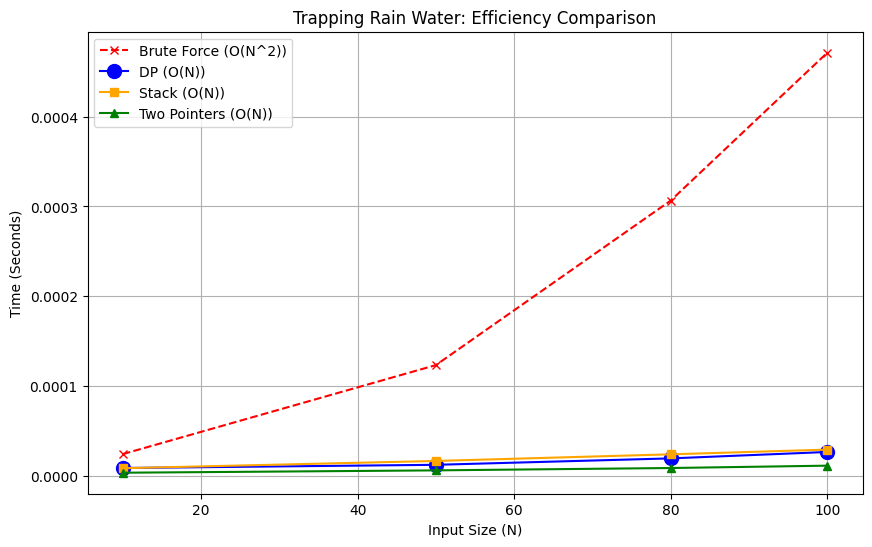

In [19]:
import time
import random
import pandas as pd
import matplotlib.pyplot as plt

def trap_brute(height):
    n = len(height)
    res = 0
    for i in range(n):
        left_max = right_max = 0
        for j in range(i + 1):
            left_max = max(left_max, height[j])
        for j in range(i, n):
            right_max = max(right_max, height[j])
        res += min(left_max, right_max) - height[i]
    return res

def trap_dp(height):
    if not height: return 0
    n = len(height)
    l_max = [0] * n
    r_max = [0] * n
    l_max[0] = height[0]
    r_max[n-1] = height[n-1]
    
    for i in range(1, n):
        l_max[i] = max(l_max[i-1], height[i])
    for i in range(n-2, -1, -1):
        r_max[i] = max(r_max[i+1], height[i])
        
    res = 0
    for i in range(n):
        res += min(l_max[i], r_max[i]) - height[i]
    return res

def trap_stack(height):
    stack = []
    res = 0
    for i in range(len(height)):
        while stack and height[i] > height[stack[-1]]:
            top = stack.pop()
            if not stack: break
            distance = i - stack[-1] - 1
            bounded_height = min(height[i], height[stack[-1]]) - height[top]
            res += distance * bounded_height
        stack.append(i)
    return res

def trap_two_pointers(height):
    if not height: return 0
    l, r = 0, len(height) - 1
    left_max, right_max = height[l], height[r]
    res = 0
    while l < r:
        if left_max < right_max:
            l += 1
            left_max = max(left_max, height[l])
            res += left_max - height[l]
        else:
            r -= 1
            right_max = max(right_max, height[r])
            res += right_max - height[r]
    return res

input_sizes = [10,50,80,100]
results = []

print("Running Benchmark... (This may take a moment due to Brute Force)")

for n in input_sizes:
    # Generate random elevation map
    height = [random.randint(0, n // 2) for _ in range(n)]
    
    row = {'Input Size (N)': n}
    
    # Measure Brute Force
    start = time.time()
    trap_brute(height)
    row['Brute Force'] = time.time() - start
    
    # Measure DP
    start = time.time()
    trap_dp(height)
    row['Dynamic Programming'] = time.time() - start

    # Measure Stack
    start = time.time()
    trap_stack(height)
    row['Monotonic Stack'] = time.time() - start
    
    # Measure Two Pointers
    start = time.time()
    trap_two_pointers(height)
    row['Two Pointers'] = time.time() - start
    
    results.append(row)
    print(f"Finished N={n}")

# --- Plotting ---
df = pd.DataFrame(results)
print("\nBenchmark Results:")
print(df)

plt.figure(figsize=(10, 6))
plt.plot(df['Input Size (N)'], df['Brute Force'], label='Brute Force (O(N^2))', marker='x', color='red', linestyle='--')
plt.plot(df['Input Size (N)'], df['Dynamic Programming'], label='DP (O(N))',marker='o',ms=10, color='blue')
plt.plot(df['Input Size (N)'], df['Monotonic Stack'], label='Stack (O(N))', marker='s', color='orange')
plt.plot(df['Input Size (N)'], df['Two Pointers'], label='Two Pointers (O(N))', marker='^', color='green')

plt.xlabel('Input Size (N)')
plt.ylabel('Time (Seconds)')
plt.title('Trapping Rain Water: Efficiency Comparison')
plt.legend()
plt.grid(True)
plt.savefig('efficiency_graph.png')
plt.show()